In [4]:
import pandas as pd
import numpy as np
from feature_selector import FeatureSelector
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import time
%matplotlib inline

In [42]:
# One building with one year data is extracted for demo
features = pd.read_csv('/Users/t.wang/Desktop/Dissertation/Python/WT-result/'+ 'Filter_One_year_features' + '.csv')
targets = pd.read_csv('/Users/t.wang/Desktop/Dissertation/Python/WT-result/'+ 'Filter_One_year_target' + '.csv')

In [43]:
features.head()

,seasonal_num,TemperatureC,Humidity,Dew PointC,Sea Level PressurehPa,Wind Direction = SE,Wind Direction = WNW,Wind Direction = NW,Wind Direction = West,Wind Direction = South,...,PERCENTILE(Dew PointC - Humidity),PERCENTILE(seasonal_num - WindDirDegrees),PERCENTILE(Dew PointC - Sea Level PressurehPa),PERCENTILE(seasonal_num - TemperatureC),PERCENTILE(Humidity - Sea Level PressurehPa),PERCENTILE(Dew PointC - WindDirDegrees),PERCENTILE(Humidity - TemperatureC),PERCENTILE(Humidity - seasonal_num),PERCENTILE(Humidity - WindDirDegrees),PERCENTILE(Sea Level PressurehPa - TemperatureC)
0,1,3.9,100.0,3.9,1007.3,0,0,0,0,0,...,0.026712,0.082820,0.716381,0.615183,0.992865,0.111358,0.983847,0.997260,0.232477,0.461701
1,1,4.4,93.0,3.3,1006.9,0,0,0,0,0,...,0.102568,0.057477,0.709817,0.602911,0.964269,0.077169,0.919121,0.951998,0.158619,0.439897
2,1,3.9,100.0,3.9,1006.4,0,0,1,0,0,...,0.026712,0.113299,0.739783,0.615183,0.994406,0.147945,0.983847,0.997260,0.269521,0.439897
3,1,3.3,97.0,2.8,1006.5,0,0,1,0,0,...,0.043208,0.113299,0.707192,0.628139,0.987900,0.142694,0.968037,0.988128,0.259532,0.457877
4,1,3.3,97.0,2.8,1006.5,0,0,1,0,0,...,0.043208,0.113299,0.707192,0.628139,0.987900,0.142694,0.968037,0.988128,0.259532,0.457877


In [44]:
targets.head()

,0
0,63.50
1,60.75
2,64.75
3,65.25
4,62.50


# Remove collinear features - FeatureSelector

In [45]:
# Combine features and targets for heatmap
features['Targets'] = targets
features_targets = features
features_targets.head()

,seasonal_num,TemperatureC,Humidity,Dew PointC,Sea Level PressurehPa,Wind Direction = SE,Wind Direction = WNW,Wind Direction = NW,Wind Direction = West,Wind Direction = South,...,PERCENTILE(seasonal_num - WindDirDegrees),PERCENTILE(Dew PointC - Sea Level PressurehPa),PERCENTILE(seasonal_num - TemperatureC),PERCENTILE(Humidity - Sea Level PressurehPa),PERCENTILE(Dew PointC - WindDirDegrees),PERCENTILE(Humidity - TemperatureC),PERCENTILE(Humidity - seasonal_num),PERCENTILE(Humidity - WindDirDegrees),PERCENTILE(Sea Level PressurehPa - TemperatureC),Targets
0,1,3.9,100.0,3.9,1007.3,0,0,0,0,0,...,0.082820,0.716381,0.615183,0.992865,0.111358,0.983847,0.997260,0.232477,0.461701,63.50
1,1,4.4,93.0,3.3,1006.9,0,0,0,0,0,...,0.057477,0.709817,0.602911,0.964269,0.077169,0.919121,0.951998,0.158619,0.439897,60.75
2,1,3.9,100.0,3.9,1006.4,0,0,1,0,0,...,0.113299,0.739783,0.615183,0.994406,0.147945,0.983847,0.997260,0.269521,0.439897,64.75
3,1,3.3,97.0,2.8,1006.5,0,0,1,0,0,...,0.113299,0.707192,0.628139,0.987900,0.142694,0.968037,0.988128,0.259532,0.457877,65.25
4,1,3.3,97.0,2.8,1006.5,0,0,1,0,0,...,0.113299,0.707192,0.628139,0.987900,0.142694,0.968037,0.988128,0.259532,0.457877,62.50


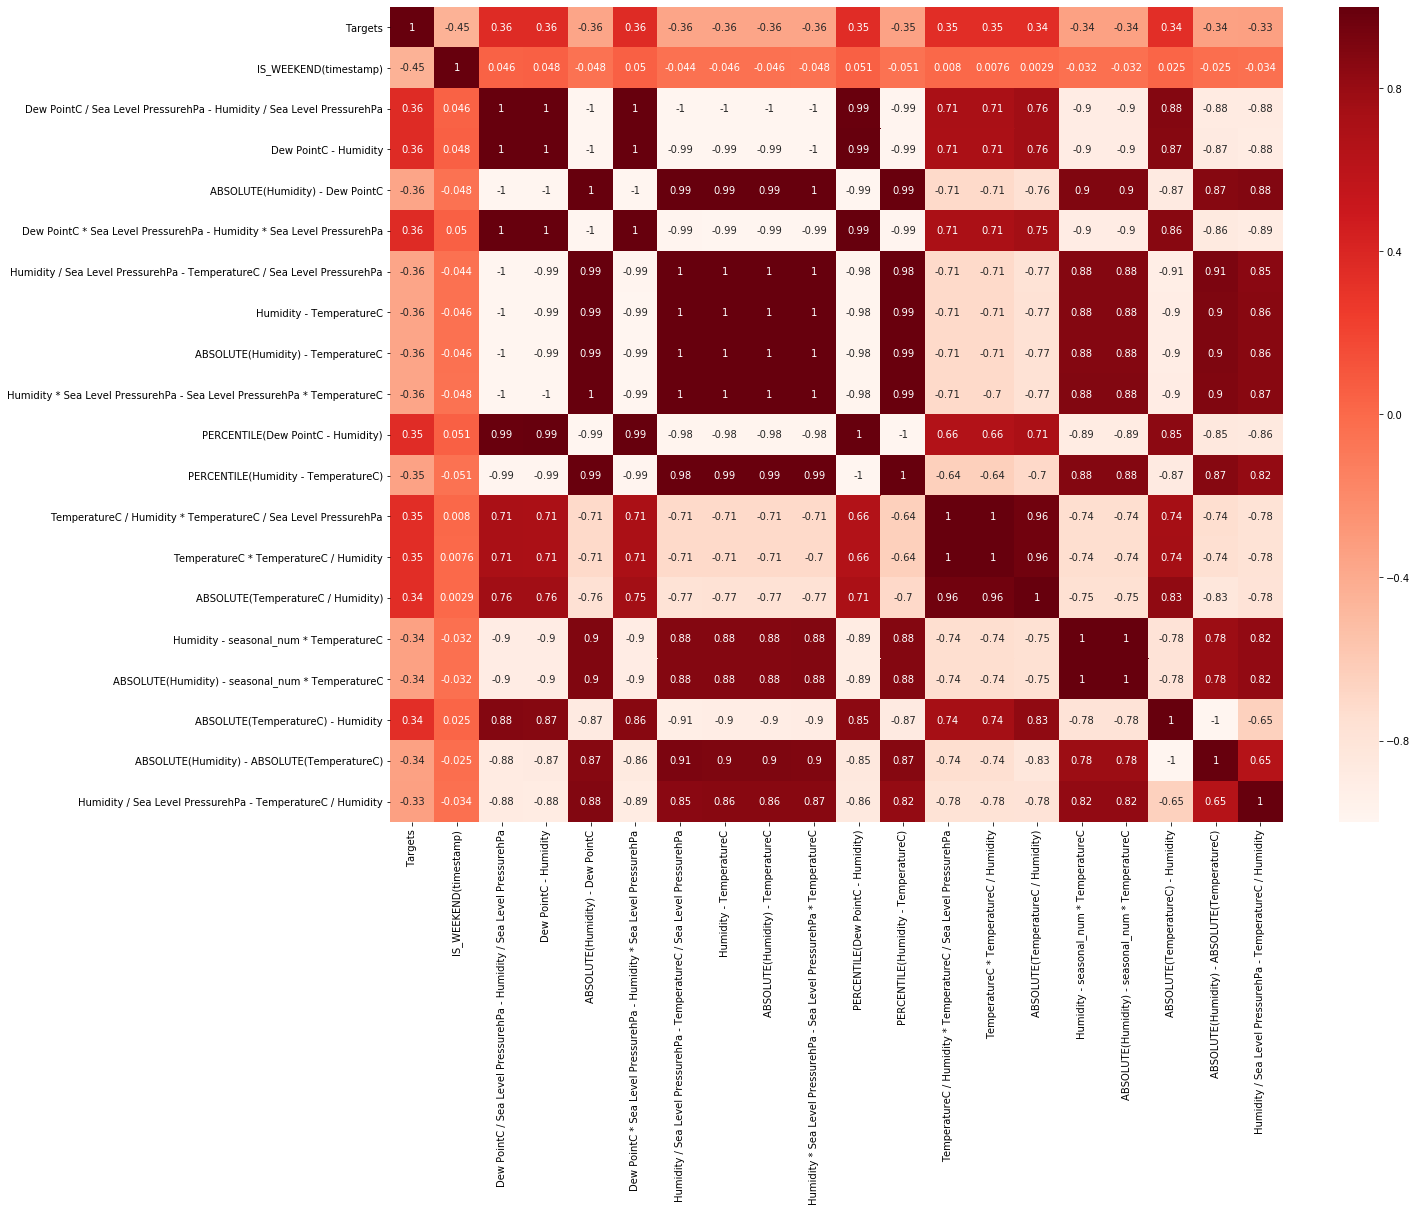

In [46]:
label = 'Targets'
k = 20 #number of variables for heatmap
cols = features_targets.corr().abs().nlargest(k, label).index #Select k columns with the highest absolute correlation with targets
cm = features_targets[cols].corr() #get the correlation of those selected columns
plt.figure(figsize=(20,15))
sns.heatmap(cm, annot=True, cmap = plt.cm.Reds)

So many correlated features

In [50]:
X = features.iloc[:,:-1] #reselect all features without targets
y = targets

In [51]:
X.head()

,seasonal_num,TemperatureC,Humidity,Dew PointC,Sea Level PressurehPa,Wind Direction = SE,Wind Direction = WNW,Wind Direction = NW,Wind Direction = West,Wind Direction = South,...,PERCENTILE(Dew PointC - Humidity),PERCENTILE(seasonal_num - WindDirDegrees),PERCENTILE(Dew PointC - Sea Level PressurehPa),PERCENTILE(seasonal_num - TemperatureC),PERCENTILE(Humidity - Sea Level PressurehPa),PERCENTILE(Dew PointC - WindDirDegrees),PERCENTILE(Humidity - TemperatureC),PERCENTILE(Humidity - seasonal_num),PERCENTILE(Humidity - WindDirDegrees),PERCENTILE(Sea Level PressurehPa - TemperatureC)
0,1,3.9,100.0,3.9,1007.3,0,0,0,0,0,...,0.026712,0.082820,0.716381,0.615183,0.992865,0.111358,0.983847,0.997260,0.232477,0.461701
1,1,4.4,93.0,3.3,1006.9,0,0,0,0,0,...,0.102568,0.057477,0.709817,0.602911,0.964269,0.077169,0.919121,0.951998,0.158619,0.439897
2,1,3.9,100.0,3.9,1006.4,0,0,1,0,0,...,0.026712,0.113299,0.739783,0.615183,0.994406,0.147945,0.983847,0.997260,0.269521,0.439897
3,1,3.3,97.0,2.8,1006.5,0,0,1,0,0,...,0.043208,0.113299,0.707192,0.628139,0.987900,0.142694,0.968037,0.988128,0.259532,0.457877
4,1,3.3,97.0,2.8,1006.5,0,0,1,0,0,...,0.043208,0.113299,0.707192,0.628139,0.987900,0.142694,0.968037,0.988128,0.259532,0.457877


In [53]:
y.head()

,0
0,63.50
1,60.75
2,64.75
3,65.25
4,62.50


In [54]:
fs = FeatureSelector(data = X, labels = y)

In [55]:
fs.identify_collinear(correlation_threshold = 0.98, one_hot=True)

2384 features with a correlation magnitude greater than 0.98.



In [56]:
# list of collinear features to remove
collinear_features = fs.ops['collinear']
# dataframe of collinear features
fs.record_collinear.head(10)

,drop_feature,corr_feature,corr_value
0,seasonal_num / Sea Level PressurehPa,seasonal_num,0.999916
1,Humidity / TemperatureC,Dew PointC / TemperatureC,-0.999765
2,Humidity / Sea Level PressurehPa,Humidity,0.999503
3,seasonal_num / Dew PointC,TemperatureC / Dew PointC,0.981198
4,Dew PointC / Sea Level PressurehPa,Dew PointC,0.999959
5,WindDirDegrees / Sea Level PressurehPa,WindDirDegrees,0.999843
6,Sea Level PressurehPa / seasonal_num,Humidity / seasonal_num,0.990495
7,Humidity / Dew PointC,TemperatureC / Dew PointC,0.999837
8,Humidity / Dew PointC,seasonal_num / Dew PointC,0.981022
9,Sea Level PressurehPa / WindDirDegrees,Humidity / WindDirDegrees,0.999985


In [57]:
# Remove the collinear features  
X_collinear = fs.remove(methods = ['collinear'], keep_one_hot=True)

Removed 2384 features.


In [58]:
X_collinear.head()

,seasonal_num,TemperatureC,Humidity,Dew PointC,Sea Level PressurehPa,Wind Direction = SE,Wind Direction = WNW,Wind Direction = NW,Wind Direction = West,Wind Direction = South,...,PERCENTILE(Sea Level PressurehPa * seasonal_num),PERCENTILE(Humidity * seasonal_num),PERCENTILE(Dew PointC * WindDirDegrees),PERCENTILE(TemperatureC * WindDirDegrees),PERCENTILE(Dew PointC * TemperatureC),PERCENTILE(seasonal_num * WindDirDegrees),PERCENTILE(Dew PointC * seasonal_num),PERCENTILE(seasonal_num * TemperatureC),PERCENTILE(Dew PointC - Sea Level PressurehPa),PERCENTILE(Sea Level PressurehPa - TemperatureC)
0,1,3.9,100.0,3.9,1007.3,0,0,0,0,0,...,0.119578,0.819463,0.693664,0.538870,0.285502,0.798973,0.565068,0.392466,0.716381,0.461701
1,1,4.4,93.0,3.3,1006.9,0,0,0,0,0,...,0.111815,0.778767,0.676541,0.563927,0.281393,0.820434,0.552968,0.404452,0.709817,0.439897
2,1,3.9,100.0,3.9,1006.4,0,0,1,0,0,...,0.104281,0.819463,0.689840,0.534932,0.285502,0.771861,0.565068,0.392466,0.739783,0.439897
3,1,3.3,97.0,2.8,1006.5,0,0,1,0,0,...,0.105993,0.810616,0.648459,0.513014,0.248459,0.771861,0.539840,0.378482,0.707192,0.457877
4,1,3.3,97.0,2.8,1006.5,0,0,1,0,0,...,0.105993,0.810616,0.648459,0.513014,0.248459,0.771861,0.539840,0.378482,0.707192,0.457877


In [59]:
# combine features and targets again to draw heatmap
X_collinear['Targets'] = targets
features_targets_col_removed = X_collinear
features_targets_col_removed.head()

,seasonal_num,TemperatureC,Humidity,Dew PointC,Sea Level PressurehPa,Wind Direction = SE,Wind Direction = WNW,Wind Direction = NW,Wind Direction = West,Wind Direction = South,...,PERCENTILE(Humidity * seasonal_num),PERCENTILE(Dew PointC * WindDirDegrees),PERCENTILE(TemperatureC * WindDirDegrees),PERCENTILE(Dew PointC * TemperatureC),PERCENTILE(seasonal_num * WindDirDegrees),PERCENTILE(Dew PointC * seasonal_num),PERCENTILE(seasonal_num * TemperatureC),PERCENTILE(Dew PointC - Sea Level PressurehPa),PERCENTILE(Sea Level PressurehPa - TemperatureC),Targets
0,1,3.9,100.0,3.9,1007.3,0,0,0,0,0,...,0.819463,0.693664,0.538870,0.285502,0.798973,0.565068,0.392466,0.716381,0.461701,63.50
1,1,4.4,93.0,3.3,1006.9,0,0,0,0,0,...,0.778767,0.676541,0.563927,0.281393,0.820434,0.552968,0.404452,0.709817,0.439897,60.75
2,1,3.9,100.0,3.9,1006.4,0,0,1,0,0,...,0.819463,0.689840,0.534932,0.285502,0.771861,0.565068,0.392466,0.739783,0.439897,64.75
3,1,3.3,97.0,2.8,1006.5,0,0,1,0,0,...,0.810616,0.648459,0.513014,0.248459,0.771861,0.539840,0.378482,0.707192,0.457877,65.25
4,1,3.3,97.0,2.8,1006.5,0,0,1,0,0,...,0.810616,0.648459,0.513014,0.248459,0.771861,0.539840,0.378482,0.707192,0.457877,62.50


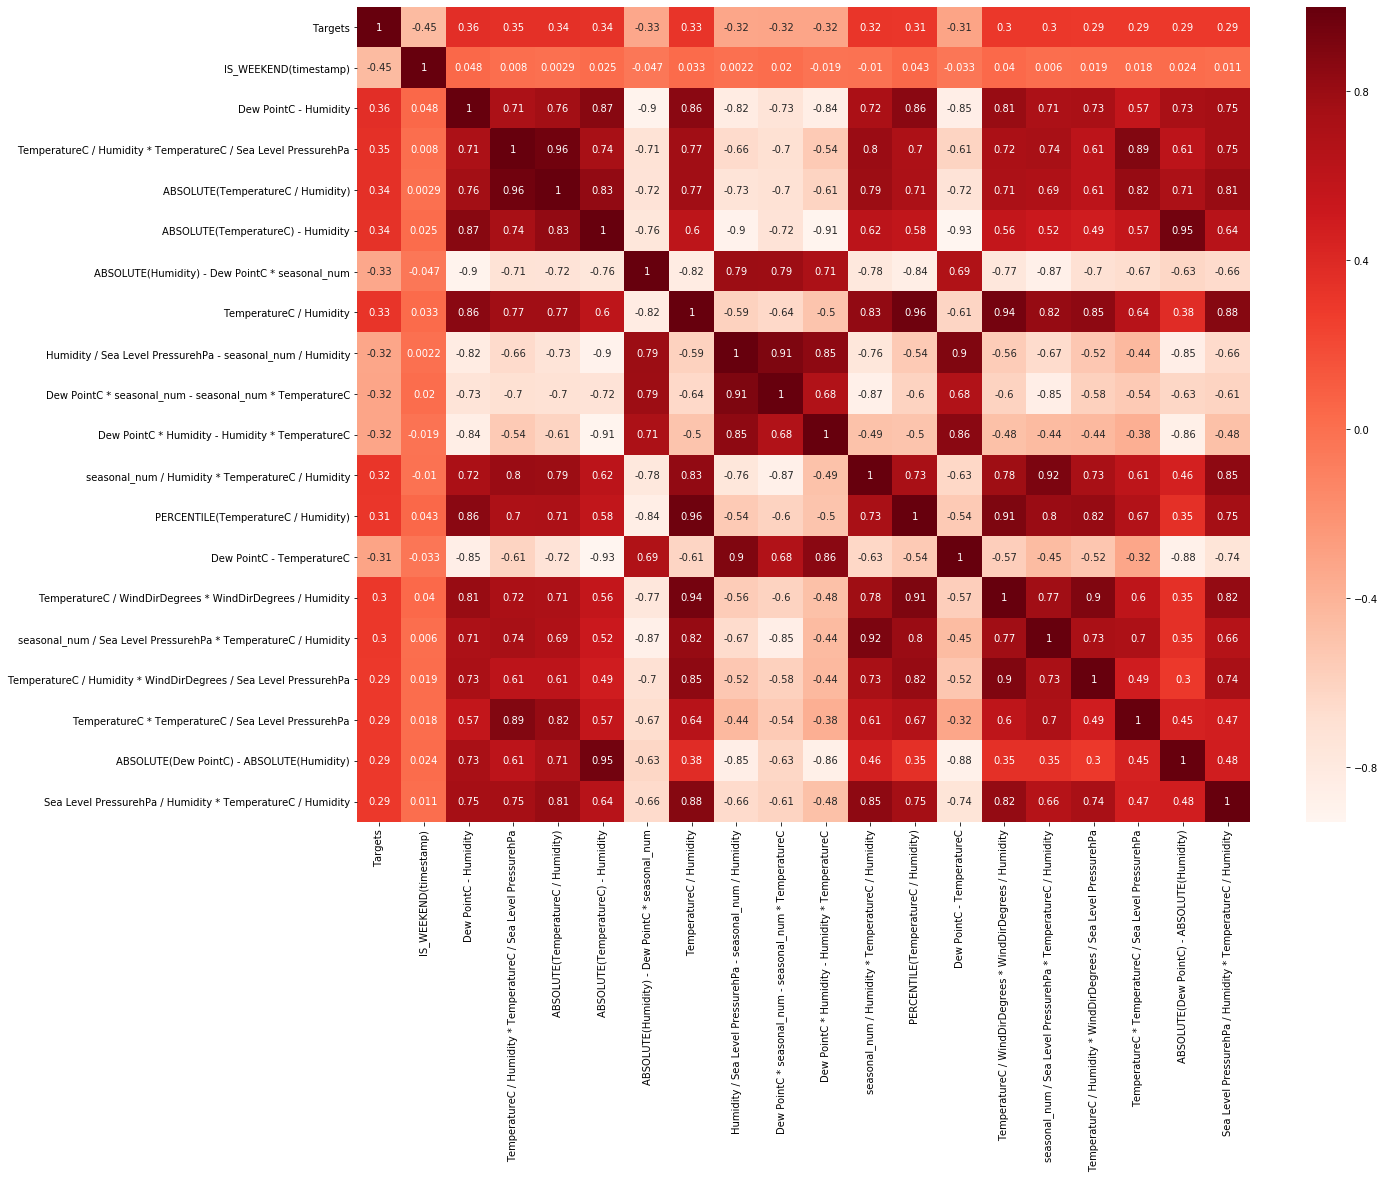

In [60]:
label = 'Targets'
k = 20 #number of variables for heatmap
cols = features_targets_col_removed.corr().abs().nlargest(k, label).index #Select k columns with the highest absolute correlation with targets
cm = features_targets_col_removed[cols].corr() #get the correlation of those selected columns
plt.figure(figsize=(20,15))
sns.heatmap(cm, annot=True, cmap = plt.cm.Reds)

Collinearity is alleviated

In [61]:
X_collinear = features_targets_col_removed.iloc[:,:-1] #reselect all features without targets
y = targets

In [62]:
X_collinear.head()

,seasonal_num,TemperatureC,Humidity,Dew PointC,Sea Level PressurehPa,Wind Direction = SE,Wind Direction = WNW,Wind Direction = NW,Wind Direction = West,Wind Direction = South,...,PERCENTILE(Sea Level PressurehPa * seasonal_num),PERCENTILE(Humidity * seasonal_num),PERCENTILE(Dew PointC * WindDirDegrees),PERCENTILE(TemperatureC * WindDirDegrees),PERCENTILE(Dew PointC * TemperatureC),PERCENTILE(seasonal_num * WindDirDegrees),PERCENTILE(Dew PointC * seasonal_num),PERCENTILE(seasonal_num * TemperatureC),PERCENTILE(Dew PointC - Sea Level PressurehPa),PERCENTILE(Sea Level PressurehPa - TemperatureC)
0,1,3.9,100.0,3.9,1007.3,0,0,0,0,0,...,0.119578,0.819463,0.693664,0.538870,0.285502,0.798973,0.565068,0.392466,0.716381,0.461701
1,1,4.4,93.0,3.3,1006.9,0,0,0,0,0,...,0.111815,0.778767,0.676541,0.563927,0.281393,0.820434,0.552968,0.404452,0.709817,0.439897
2,1,3.9,100.0,3.9,1006.4,0,0,1,0,0,...,0.104281,0.819463,0.689840,0.534932,0.285502,0.771861,0.565068,0.392466,0.739783,0.439897
3,1,3.3,97.0,2.8,1006.5,0,0,1,0,0,...,0.105993,0.810616,0.648459,0.513014,0.248459,0.771861,0.539840,0.378482,0.707192,0.457877
4,1,3.3,97.0,2.8,1006.5,0,0,1,0,0,...,0.105993,0.810616,0.648459,0.513014,0.248459,0.771861,0.539840,0.378482,0.707192,0.457877


In [64]:
y.head()

,0
0,63.50
1,60.75
2,64.75
3,65.25
4,62.50


# Remove features with low variance - SKlearn

In [65]:
# get_support to maintain the index name
def variance_threshold_selector(data, threshold_num):
    variance_selector = VarianceThreshold(threshold=(threshold_num * (1 - threshold_num)))
    variance_selector.fit(data)
    return data[data.columns[variance_selector.get_support(indices=True)]]

In [66]:
print(X_collinear.shape)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_collinear_Variance = variance_threshold_selector(X_collinear, 0.8)
print(X_collinear_Variance.shape)
# VarianceThreshold has removed columns with zero-variance more than 80% of the samples

(8760, 474)
(8760, 350)


In [67]:
X_collinear_Variance.head()

,seasonal_num,TemperatureC,Humidity,Dew PointC,Sea Level PressurehPa,Wind Direction is unknown,Conditions = Overcast,Conditions = Mostly Cloudy,WindDirDegrees,HOUR(timestamp) is unknown,...,Humidity * seasonal_num - WindDirDegrees,Dew PointC / seasonal_num - Dew PointC / WindDirDegrees,seasonal_num / WindDirDegrees - TemperatureC / WindDirDegrees,Dew PointC * TemperatureC - seasonal_num * WindDirDegrees,Dew PointC / seasonal_num - TemperatureC * WindDirDegrees,Dew PointC / TemperatureC - WindDirDegrees / Dew PointC,Humidity / seasonal_num - WindDirDegrees / seasonal_num,Dew PointC * WindDirDegrees - TemperatureC * WindDirDegrees,Dew PointC / WindDirDegrees - Sea Level PressurehPa * seasonal_num,Dew PointC / WindDirDegrees - TemperatureC / seasonal_num
0,1,3.9,100.0,3.9,1007.3,0,0,0,330.0,1,...,-230.0,3.888182,-0.008788,-314.79,-1283.1,-83.615385,-230.0,0.0,-1007.288182,-3.888182
1,1,4.4,93.0,3.3,1006.9,0,1,0,340.0,0,...,-247.0,3.290294,-0.010000,-325.48,-1492.7,-102.280303,-247.0,-374.0,-1006.890294,-4.390294
2,1,3.9,100.0,3.9,1006.4,0,0,0,320.0,1,...,-220.0,3.887812,-0.009062,-304.79,-1244.1,-81.051282,-220.0,0.0,-1006.387812,-3.887812
3,1,3.3,97.0,2.8,1006.5,0,0,0,320.0,1,...,-223.0,2.791250,-0.007187,-310.76,-1053.2,-113.437229,-223.0,-160.0,-1006.491250,-3.291250
4,1,3.3,97.0,2.8,1006.5,0,0,0,320.0,1,...,-223.0,2.791250,-0.007187,-310.76,-1053.2,-113.437229,-223.0,-160.0,-1006.491250,-3.291250


# SelectPercentile based on mutual information - SKlearn

In [75]:
# get_support to maintain the index name
def function_percentile_selector(features,labels, function, percentile):
    selector = SelectPercentile(function, percentile).fit(features,labels)
    return features[features.columns[selector.get_support(indices=True)]], selector.scores_


In [76]:
X_collinear_Variance_MI, scores = function_percentile_selector(X_collinear_Variance, y, mutual_info_regression, 20)
X_collinear_Variance_MI.shape

(8760, 70)

In [77]:
pd.DataFrame(X_collinear_Variance_MI).head()

,TemperatureC,IS_WEEKEND(timestamp),Sea Level PressurehPa / TemperatureC,seasonal_num / TemperatureC,TemperatureC / seasonal_num,Dew PointC * seasonal_num,seasonal_num * TemperatureC,ABSOLUTE(TemperatureC),Humidity * TemperatureC / seasonal_num,Sea Level PressurehPa * seasonal_num / Dew PointC,...,Sea Level PressurehPa / Humidity - seasonal_num * TemperatureC,Sea Level PressurehPa * seasonal_num - TemperatureC / seasonal_num,seasonal_num - TemperatureC / Humidity,ABSOLUTE(Dew PointC) - ABSOLUTE(TemperatureC),TemperatureC * WindDirDegrees - TemperatureC / seasonal_num,Dew PointC / Humidity - seasonal_num,Dew PointC * Humidity - Humidity * TemperatureC,Sea Level PressurehPa * seasonal_num - WindDirDegrees / TemperatureC,Sea Level PressurehPa / seasonal_num - TemperatureC / seasonal_num,ABSOLUTE(Dew PointC) - TemperatureC
0,3.9,False,258.282051,0.256410,3.9,3.9,3.9,3.9,390.0,258.282051,...,6.173000,1003.4,0.961000,0.0,1283.1,-0.961000,0.0,922.684615,1003.4,0.0
1,4.4,False,228.840909,0.227273,4.4,3.3,4.4,4.4,409.2,305.121212,...,6.426882,1002.5,0.952688,-1.1,1491.6,-0.964516,-102.3,929.627273,1002.5,-1.1
2,3.9,False,258.051282,0.256410,3.9,3.9,3.9,3.9,390.0,258.051282,...,6.164000,1002.5,0.961000,0.0,1244.1,-0.961000,0.0,924.348718,1002.5,0.0
3,3.3,False,305.000000,0.303030,3.3,2.8,3.3,3.3,320.1,359.464286,...,7.076289,1003.2,0.965979,-0.5,1052.7,-0.971134,-48.5,909.530303,1003.2,-0.5
4,3.3,False,305.000000,0.303030,3.3,2.8,3.3,3.3,320.1,359.464286,...,7.076289,1003.2,0.965979,-0.5,1052.7,-0.971134,-48.5,909.530303,1003.2,-0.5


In [84]:
pd.DataFrame(scores).sort_values(by=0, ascending=False).head()

,0
36,0.214463
316,0.208728
294,0.207260
221,0.200067
129,0.195919


In [85]:
X_collinear_Variance_MI_score = pd.DataFrame({'Feature':list(pd.DataFrame(X_collinear_Variance).columns),
                                     'Scores':scores}).set_index('Feature') #set feature columns as index
X_collinear_Variance_MI_score.sort_values(by='Scores', ascending=False)#.reset_index(drop=True)
# The feature labels are tramsformed to nemeric index due to the operation of VarianceThreshold

,Scores
Feature,
seasonal_num * TemperatureC,0.214463
Dew PointC / Humidity - seasonal_num,0.208728
seasonal_num - TemperatureC / Humidity,0.207260
Sea Level PressurehPa / seasonal_num - Sea Level PressurehPa / TemperatureC,0.200067
Sea Level PressurehPa / seasonal_num * Sea Level PressurehPa / TemperatureC,0.195919
Sea Level PressurehPa * seasonal_num - Sea Level PressurehPa / TemperatureC,0.192951
Sea Level PressurehPa / seasonal_num * TemperatureC / seasonal_num,0.191807
Dew PointC / TemperatureC * Sea Level PressurehPa / TemperatureC,0.188028
Sea Level PressurehPa * Sea Level PressurehPa / TemperatureC,0.185323


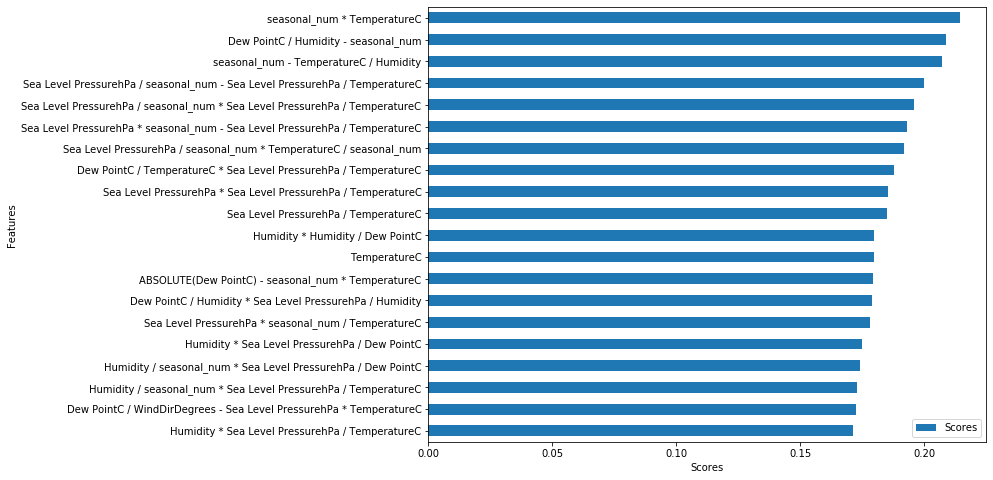

In [88]:
# plot 20 features with the largets scores
fig = X_collinear_Variance_MI_score.nlargest(20, columns='Scores').sort_values('Scores', ascending=True).plot.barh(
    figsize=(10,8), use_index=True)
fig.set_ylabel("Features")
fig.set_xlabel("Scores")
plt.show()

In [89]:
%store X_collinear_Variance_MI
%store y

Stored 'X_collinear_Variance_MI' (DataFrame)
Stored 'y' (DataFrame)
